# 1. Análise exploratória dos dados

## Importando bibliotecas e carregando os dados

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
db = pd.read_csv('Gabriel Reposição.csv', index_col=0)
db

,"X, metros","Y, metros","Zn, ppm"
ID,,,
1,754551,9305688,85
2,754612,9305688,70
3,754673,9305688,68
4,754734,9305688,98
5,754795,9305688,80
...,...,...,...
268,754856,9304103,80
269,754917,9304103,70
270,754978,9304103,78


## Georreferenciando a tabela

In [4]:
gdb = gpd.GeoDataFrame(db, geometry=gpd.points_from_xy(x=db['X, metros'], y=db['Y, metros']), crs='EPSG:31984')

In [5]:
gdb.head()

,"X, metros","Y, metros","Zn, ppm",geometry
ID,,,,
1,754551,9305688,85,POINT (754551 9305688)
2,754612,9305688,70,POINT (754612 9305688)
3,754673,9305688,68,POINT (754673 9305688)
4,754734,9305688,98,POINT (754734 9305688)
5,754795,9305688,80,POINT (754795 9305688)


In [9]:
print(f'''DADOS DE Mn:
Mínimo: {gdb['Zn, ppm'].min()} ppm
Máximo: {gdb['Zn, ppm'].max()} ppm
Mediana = {int(gdb['Zn, ppm'].median())} ppm
Média = {round((gdb['Zn, ppm'].mean()), 2)} ppm
10% = {int(gdb['Zn, ppm'].quantile(.10))} ppm
25% = {int(gdb['Zn, ppm'].quantile(.25))} ppm
30% = {int(gdb['Zn, ppm'].quantile(.30))} ppm
50% = {int(gdb['Zn, ppm'].quantile(.50))} ppm
70% = {int(gdb['Zn, ppm'].quantile(.70))} ppm
75% = {int(gdb['Zn, ppm'].quantile(.75))} ppm
90% = {int(gdb['Zn, ppm'].quantile(.90))} ppm
Variância = {round((gdb['Zn, ppm'].var()), 2)} ppm
Desvio padrão = {round((gdb['Zn, ppm'].std()), 2)} ppm
Assimetria = {round((gdb['Zn, ppm'].skew()), 2)}
Coeficiente de Variação = {round(((gdb['Zn, ppm'].std() / gdb['Zn, ppm'].mean()) * 100), 2)}%''')

DADOS DE Mn:
Mínimo: 19 ppm
Máximo: 3750 ppm
Mediana = 129 ppm
Média = 235.02 ppm
10% = 83 ppm
25% = 97 ppm
30% = 100 ppm
50% = 129 ppm
70% = 180 ppm
75% = 210 ppm
90% = 459 ppm
Variância = 111812.13 ppm
Desvio padrão = 334.38 ppm
Assimetria = 5.89
Coeficiente de Variação = 142.28%


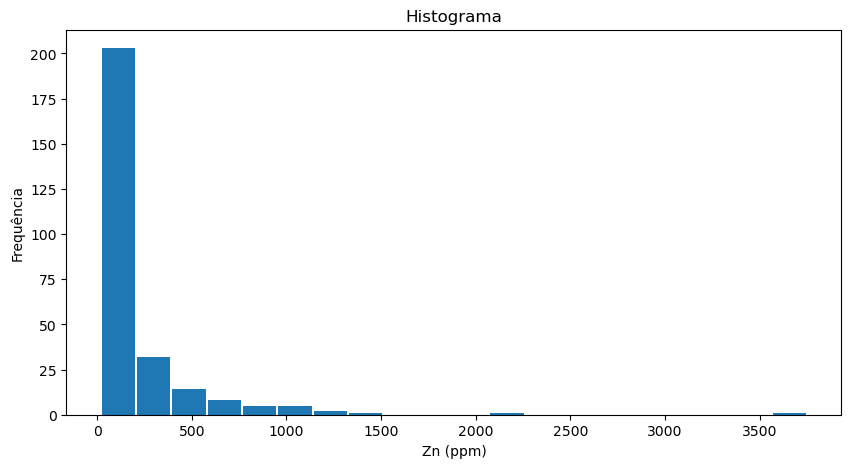

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(db['Zn, ppm'], bins=20, histtype='bar', rwidth=0.95)
ax.set_xlabel('Zn (ppm)')
ax.set_ylabel('Frequência')
ax.set_title('Histograma')
plt.show()

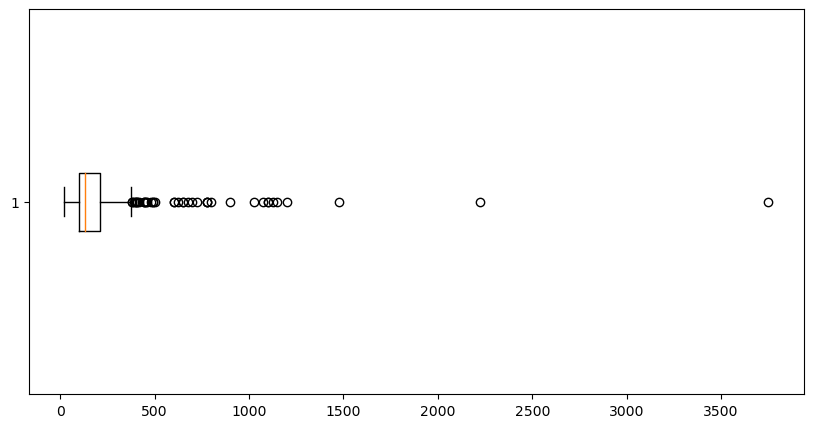

In [11]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.boxplot(db['Zn, ppm'], vert=False)
plt.show()

In [29]:
p0_10 = 0
p10_30 = 0
p30_50 = 0
p50_70 = 0
p70_90 = 0
p90_100 = 0

for i in db['Zn, ppm']:
    if i <= 83:
        p0_10 += 1
    elif i > 83 and i <= 100:
        p10_30 += 1
    elif i > 100 and i <= 129:
        p30_50 += 1
    elif i > 129 and i <= 180:
        p50_70 += 1
    elif i > 180 and i <= 459:
        p70_90 += 1
    elif i > 459:
        p90_100 += 1
print(f'''
Valores <= a 83 ppm: {p0_10}
Valores entre 83 e 100 ppm: {p10_30}
Valores entre 100 e 129 ppm: {p30_50}
Valores entre 129 e 180 ppm: {p50_70}
Valores entre 180 e 459 ppm: {p70_90}
Valores maiores do que 459 ppm: {p90_100}
Totalizando {p0_10 + p10_30 + p30_50 + p50_70 + p70_90 + p90_100} dados
''')


Valores <= a 83 ppm: 32
Valores entre 83 e 100 ppm: 51
Valores entre 100 e 129 ppm: 53
Valores entre 129 e 180 ppm: 55
Valores entre 180 e 459 ppm: 53
Valores maiores do que 459 ppm: 28
Totalizando 272 dados

